#### Problem Statement

An ice cream business would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). Linear Regression model might be a good candidate to solve this problem.

Data set:
- Independent variable X: Outside Air Temperature
- Dependent variable Y: Overall daily revenue generated in dollars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Understanding

In [2]:
ic_df = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\3. Simple Linear Regression\\IceCreamData.csv")

In [3]:
ic_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [4]:
ic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
ic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


In [6]:
print(f'Ice Cream Data Set Column: {ic_df.columns.tolist()}')
print(f'Ice Cream Data Set Shape: {ic_df.shape}')

Ice Cream Data Set Column: ['Temperature', 'Revenue']
Ice Cream Data Set Shape: (500, 2)


#### Exploratory Data Analysis

<Figure size 800x600 with 0 Axes>

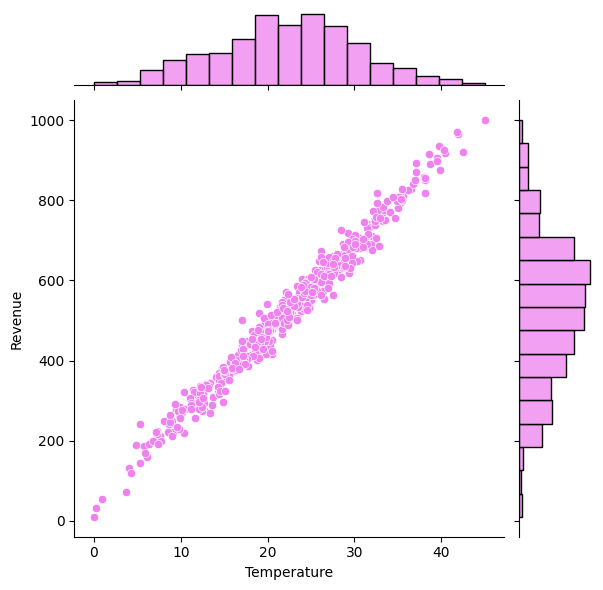

In [7]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Temperature', y='Revenue', data=ic_df, color='violet')
plt.show()

<Figure size 800x600 with 0 Axes>

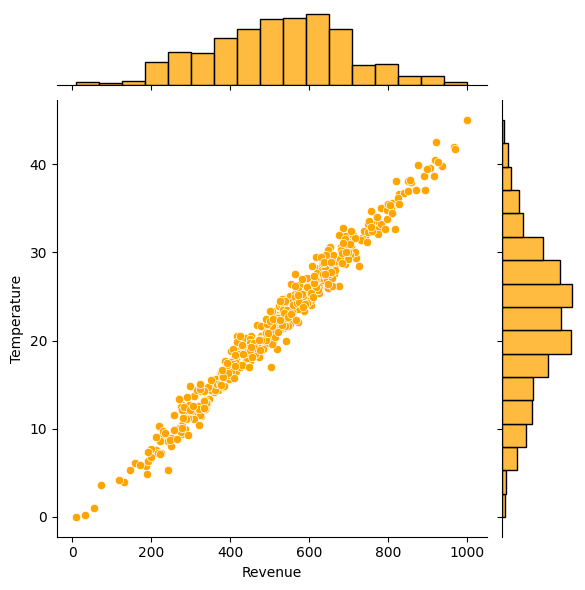

In [8]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Revenue', y='Temperature', data=ic_df, color='orange')
plt.show()

<Figure size 800x600 with 0 Axes>

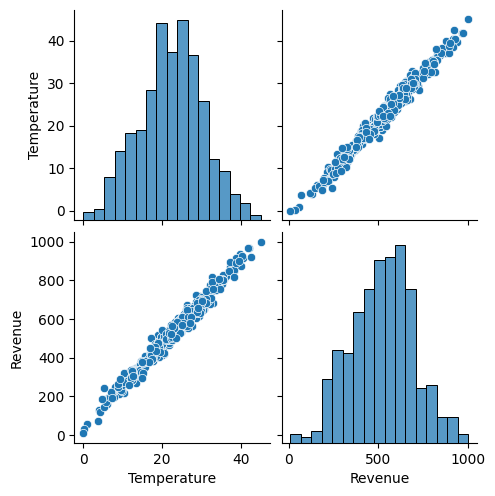

In [9]:
plt.figure(figsize=(8,6))
sns.pairplot(ic_df)
plt.show()

<Figure size 800x600 with 0 Axes>

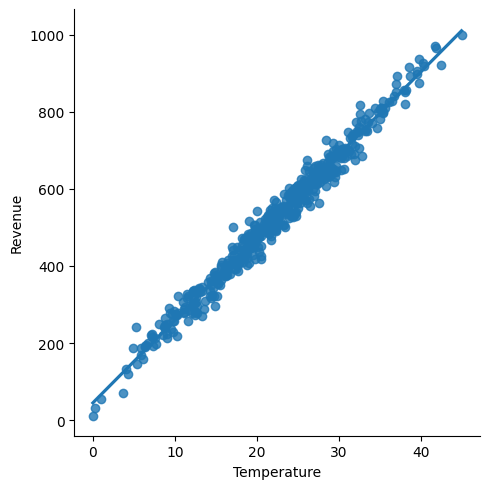

In [10]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Temperature', y='Revenue', data=ic_df)
plt.show()

<Figure size 800x600 with 0 Axes>

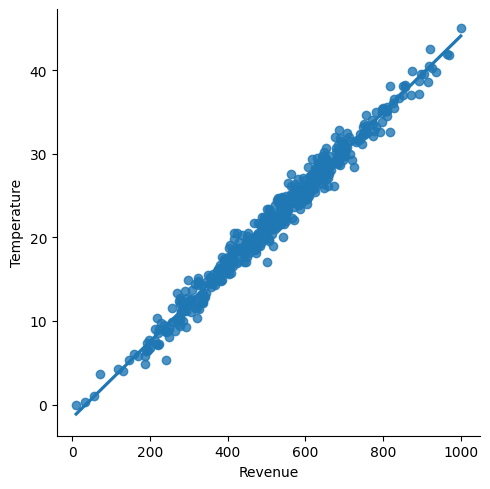

In [11]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Revenue', y='Temperature', data=ic_df)
plt.show()

#### Create Train and Test Set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
ic_df.duplicated().sum()

0

In [14]:
X = ic_df[['Temperature']]
y = ic_df['Revenue']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(400, 1)

(400,)

(100, 1)

(100,)

#### Train the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression(fit_intercept=True)

In [19]:
lr2 = LinearRegression(fit_intercept=False)

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Linear Model Coefficient (m):', lr.coef_)
print('Linear Model Coefficient (b):', lr.intercept_)

Linear Model Coefficient (m): [21.38197386]
Linear Model Coefficient (b): 46.804641277423684


In [22]:
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [23]:
print('Linear Model Coefficient (m):', lr2.coef_)
print('Linear Model Coefficient (b):', lr2.intercept_)

Linear Model Coefficient (m): [23.24452656]
Linear Model Coefficient (b): 0.0


In [43]:
y_predict_train = lr.predict(X_train)

#### Test the Model

In [24]:
y_predict = lr.predict(X_test)

In [25]:
y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

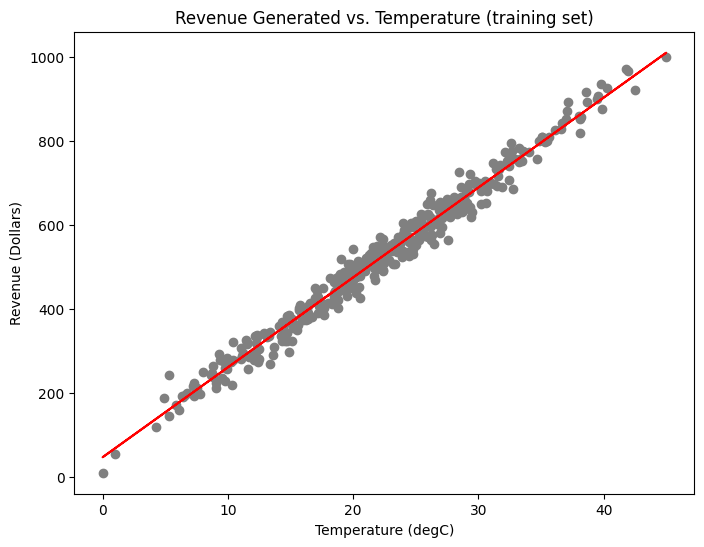

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('Temperature (degC)')
plt.ylabel('Revenue (Dollars)')
plt.title('Revenue Generated vs. Temperature (training set)')
plt.show()

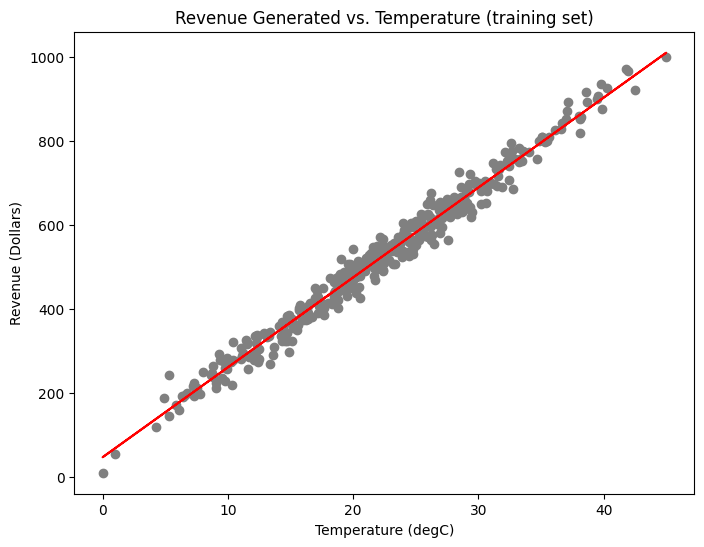

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('Temperature (degC)')
plt.ylabel('Revenue (Dollars)')
plt.title('Revenue Generated vs. Temperature (training set)')
plt.show()

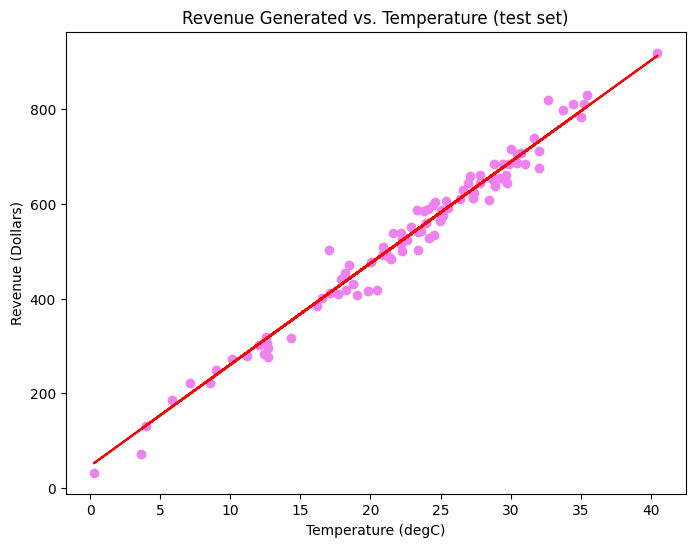

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='violet')
plt.plot(X_test, y_predict, color='red')
plt.xlabel('Temperature (degC)')
plt.ylabel('Revenue (Dollars)')
plt.title('Revenue Generated vs. Temperature (test set)')
plt.show()

In [29]:
y_predict_2 = lr2.predict(X_test)

In [30]:
y_predict_2

array([690.45967153, 636.328236  , 557.51162139, 491.48336055,
       618.18944036, 280.38652685, 259.80760263, 292.21888579,
       499.48249181, 694.54582337, 736.14171073, 384.88166122,
       418.33208884, 678.96599255,   6.20693242, 165.21026355,
       517.76948758, 562.14417208, 583.81115423, 690.79283928,
       553.79904094, 801.28925249, 661.65389036, 568.85009945,
       940.79871668, 671.77127417, 292.60574863, 635.09445744,
       743.9217414 , 707.95249109, 422.10239661, 461.38620437,
       721.28539485, 818.60807235, 645.97826792, 485.78076481,
       758.93230958, 294.93654007, 234.69172316,  92.66484368,
       582.42138514, 199.59954417, 544.09060645, 376.35904532,
       423.82274889, 593.80387439, 571.04559752,  85.18350933,
       465.27137845, 525.7752856 , 626.59618717, 496.4571588 ,
       475.93220535, 491.13652153, 548.36227843, 634.87337038,
       572.16956893, 687.79346692, 135.33735886, 667.14758312,
       583.71807873, 715.06532574, 531.6153862 , 634.13

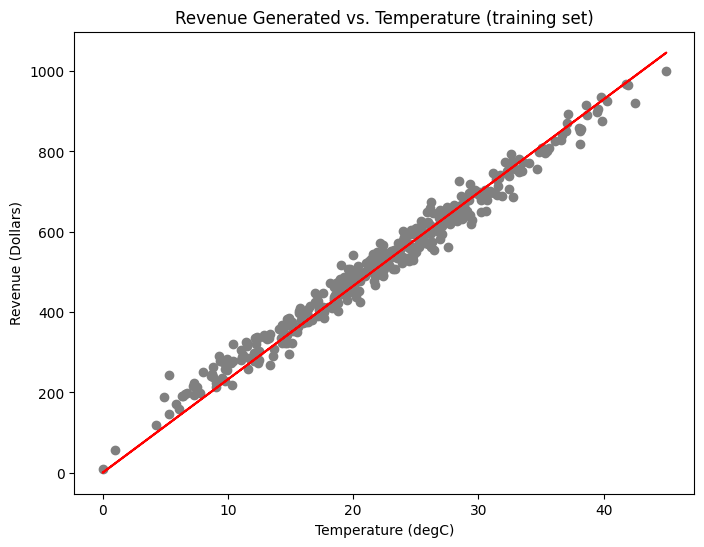

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lr2.predict(X_train), color='red')
plt.xlabel('Temperature (degC)')
plt.ylabel('Revenue (Dollars)')
plt.title('Revenue Generated vs. Temperature (training set)')
plt.show()

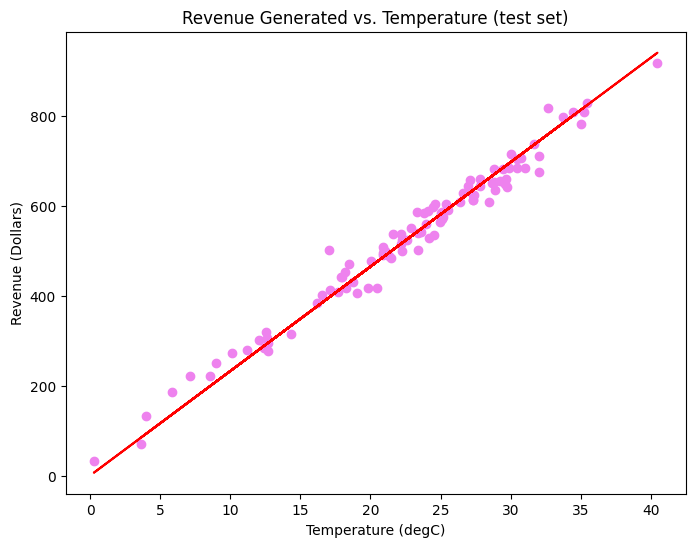

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='violet')
plt.plot(X_test, y_predict_2, color='red')
plt.xlabel('Temperature (degC)')
plt.ylabel('Revenue (Dollars)')
plt.title('Revenue Generated vs. Temperature (test set)')
plt.show()

In [33]:
new_t = {'Temperature': [[36], [38], [42]]}
new_t_df = pd.DataFrame(new_t['Temperature'], columns=['Temperature'])
revenue = lr.predict(new_t_df)

In [34]:
revenue

array([816.55570007, 859.31964778, 944.8475432 ])

#### Model Evaluation

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### Training Model Evaluation

In [47]:
r2 = r2_score(y_train, y_predict_train)
mae = mean_absolute_error(y_train, y_predict_train)
mse = mean_squared_error(y_train, y_predict_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_predict_train)
n = len(y_train)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9802510145652878
Mean Absolute Error: 19.70249635904617
Mean Squared Error: 616.5053542324285
Root Mean Squared Error: 24.829525855972935
Mean Absolute Percentage Error: 0.052913655645653875
Adjusted R-squared: 0.980201393998869


#### Testing Model Evaluation

In [42]:
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_predict)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.9771532792713993
Mean Absolute Error: 19.184547408370435
Mean Squared Error: 652.5200612979733
Root Mean Squared Error: 25.544472225864705
Mean Absolute Percentage Error: 0.05086538627070511
Adjusted R-squared: 0.9769201494680462
